# Test - moving targets - CooperativeField
Predators hunting prey, who can team up to present a smaller target at the cost of greater visibility.

In [1]:
import shutil
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import explorationlib
from explorationlib.agent import Diffusion2d
from explorationlib.agent import DiffusionDiscrete
from explorationlib.agent import DiffusionGrid

from explorationlib.local_gym import uniform_targets
from explorationlib.local_gym import constant_values
from explorationlib.local_gym import CooperativeGrid

from explorationlib.run import multi_experiment
from explorationlib.util import select_exp
from explorationlib.util import select_agent
from explorationlib.util import load
from explorationlib.util import save

from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_positions2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

from explorationlib import score
from explorationlib.score import search_efficiency
from explorationlib.score import first_reward
from explorationlib.score import total_reward

pygame 2.0.1 (SDL 2.0.14, Python 3.6.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

# 10 pred, 190 preys

In [ ]:
# How long to run? Longer is better, but slower.
num_steps = 40
num_experiments = 1

num_agents = 200
num_targets = 190 # aka friends
target_index = list(range(0, num_targets))

detection_radius =  1
p_target = 0.5

friend_radius =  2
p_friend = 1.0

# Intial size of 'box' targets
# start in.
target_boundary = (10, 10)

# -
min_length = 1
step_size = 1

# Create env 
env = CooperativeGrid(num_agents=num_agents)

# Preds and preys
scale = 2
agents = [DiffusionGrid(scale=scale) for _ in range(num_agents)]

# Intial target locations
targets = uniform_targets(num_targets, target_boundary)
values = constant_values(targets, 1.0)

# Register target locations
env.add_targets(
    target_index, 
    targets, 
    values, 
    detection_radius=detection_radius,
    friend_radius=friend_radius,
    p_target=p_target,
    p_friend=p_friend
)

# Run!
comp_exp = multi_experiment(
    f"test_comp",
    agents, 
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    seed=404,
    split_state=False,
    dump=False
)

In [4]:
print(f">>> Target index : {target_index}")

>>> Target index : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]


<IPython.core.display.Javascript object>

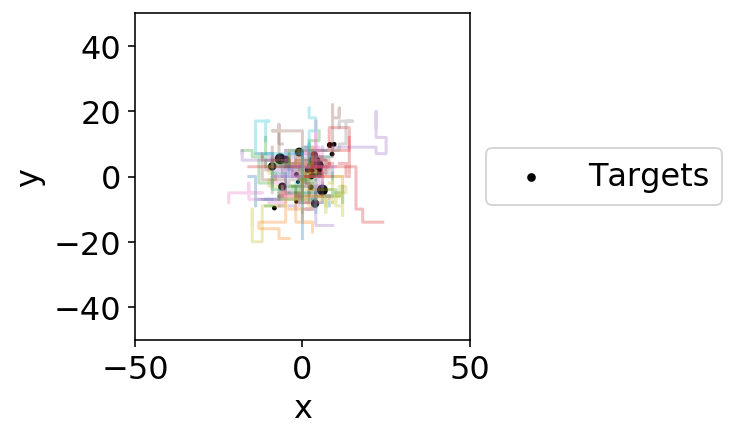

<IPython.core.display.Javascript object>

In [5]:
num_experiment = 0
num_agent = 0
plot_boundary = (50, 50)

# Example bout
ax = None
ax = plot_positions2d(
    select_exp(comp_exp, num_experiment),
    num_agents,
    boundary=plot_boundary,
    # labels=["Prey 1", "Prey 2", "Pred"],
    colors=None,
    alpha=0.3,
    figsize=(3, 3),
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

In [6]:
total_reward(comp_exp)

total_reward: 100%|██████████| 1/1 [00:00<00:00, 161.01it/s]


[368.0]

<IPython.core.display.Javascript object>

In [7]:
sorted(env.dead)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 164,
 165,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 187,
 188,
 189]

<IPython.core.display.Javascript object>

Print all friend events/pairs. (This is not the same as final team sizes as teams can have more than two member; parse common prefixs to get teams)

In [8]:
sorted(env.friends)

[(0, 26),
 (1, 48),
 (2, 161),
 (4, 119),
 (5, 61),
 (5, 100),
 (5, 169),
 (7, 21),
 (7, 73),
 (8, 30),
 (8, 67),
 (8, 96),
 (8, 142),
 (8, 143),
 (10, 23),
 (12, 136),
 (13, 53),
 (13, 62),
 (13, 108),
 (14, 141),
 (15, 109),
 (16, 110),
 (17, 1),
 (17, 94),
 (17, 106),
 (17, 177),
 (18, 126),
 (18, 168),
 (18, 188),
 (19, 135),
 (20, 99),
 (24, 157),
 (27, 36),
 (29, 145),
 (30, 158),
 (32, 50),
 (32, 74),
 (32, 102),
 (34, 17),
 (37, 4),
 (38, 24),
 (43, 10),
 (44, 9),
 (46, 3),
 (46, 71),
 (46, 86),
 (46, 131),
 (46, 167),
 (46, 180),
 (47, 112),
 (52, 111),
 (53, 25),
 (53, 151),
 (54, 79),
 (56, 35),
 (56, 44),
 (56, 98),
 (56, 134),
 (57, 117),
 (58, 164),
 (59, 42),
 (59, 149),
 (60, 45),
 (60, 172),
 (63, 104),
 (66, 155),
 (67, 123),
 (68, 54),
 (68, 80),
 (71, 55),
 (72, 91),
 (74, 87),
 (74, 133),
 (74, 173),
 (75, 113),
 (77, 101),
 (78, 89),
 (81, 90),
 (81, 92),
 (81, 187),
 (82, 29),
 (84, 138),
 (85, 75),
 (85, 107),
 (85, 160),
 (87, 178),
 (88, 83),
 (88, 152),
 (88,

<IPython.core.display.Javascript object>

Any values > 0 at the end are from surviving teams

In [62]:
env.values

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0., 16.,  9.,  0.,  0.,  0., 16.,  0.,  0.,  3.,  0.,
        0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9., 17.,
       20.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 10., 20.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0

<IPython.core.display.Javascript object>